---
- DataBunch 
- Learner
- fit
- Callbacks
---

In [0]:
# Download datasets

# !wget http://deeplearning.net/data/mnist/mnist.pkl.gz
# !mkdir mnist
# !mv mnist.pkl.gz ./mnist

In [0]:
# Imports
%matplotlib inline
from fastai.basics import *

## Bala Utils

In [1]:
def bala_show1img(x, shape, cmap="gray", ax=None):
    tmp = x.reshape(shape)
    if ax:
        ax.imshow(tmp, cmap=cmap)
        ax.axis('off')
    else:
        plt.imshow(tmp, cmap=cmap)
        plt.axis('off')

def bala_show1img_ds(x, shape=(28,28), cmap="gray", ax=None):
    inp, tar = x #to unwrap the tuple..
    tmp = inp.reshape(shape)
    if ax:
        ax.imshow(tmp, cmap=cmap)
        ax.axis('off')
    else:
        plt.imshow(tmp, cmap=cmap)
        plt.axis('off')

def bala_show_random(x, n=5, figsize=(10,10), cmap="gray"):
    len_x = len(x)
    fig, ax = plt.subplots(nrows=1, ncols=n, figsize=figsize)
    for i in range(n):
        rand_idx = random.randint(0, len_x)
        bala_show1img(x[rand_idx], shape=(28,28), ax=ax[i], cmap=cmap)

## Load Datasets

## Params & Hyper params

In [0]:
# DataBunch??

In [0]:
## Starting Point


import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)
  

def get_data():
    path = datasets.download_data(MNIST_URL, ext='.gz')
    with gzip.open(path, 'rb') as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    return map(tensor, (x_train,y_train,x_valid,y_valid))

def normalize(x, m, s): return (x-m)/s

def test_near_zero(a,tol=1e-3): assert a.abs()<tol, f"Near zero: {a}"

from torch.nn import init

def mse(output, targ): return (output.squeeze(-1) - targ).pow(2).mean()

from torch import nn


In [0]:
x_train,y_train,x_valid,y_valid = get_data()

In [0]:
n,m = x_train.shape
c = y_train.max()+1
nh = 50

print(n,m,c,nh)

50000 784 tensor(10) 50


In [0]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [0]:
n_out = int(c)
model = Model(m, nh, n_out)
pred = model(x_train)

In [0]:
def log_softmax(x):
  return (x.exp()/  (x.exp().sum(-1, keepdim=True))).log()

sm_pred = log_softmax(pred)

def nll(input, target): 
  return -input[range(target.shape[0]), target].mean()

loss = nll(sm_pred, y_train)
loss

tensor(2.3075, grad_fn=<NegBackward>)

In [0]:
def log_softmax(x): 
  return x - x.exp().sum(-1,keepdim=True).log()

test_near(nll(log_softmax(pred), y_train), loss)

In [0]:
test_near(F.cross_entropy(pred, y_train), loss)

## Basic Training Loop

In [0]:
## Basic Training Loop

In [0]:
loss_func = F.cross_entropy


In [0]:
def accuracy(pred, targ):
  return (torch.argmax(pred, dim=1) == targ).float().mean()

In [0]:
bs = 64

xb = x_train[0: bs]
preds = model(xb)
preds[0], preds.shape

(tensor([-0.0531,  0.0773,  0.0470, -0.0604, -0.2098, -0.1652,  0.0045,  0.0460,
          0.0985, -0.1903], grad_fn=<SelectBackward>), torch.Size([64, 10]))

In [0]:
yb = y_train[0:bs]

In [0]:
loss_func(preds, yb)

tensor(2.3178, grad_fn=<NllLossBackward>)

In [0]:
accuracy(preds, yb)

tensor(0.0312)

In [0]:
lr = 0.5(
epochs = 1)

TypeError: ignored

In [0]:
n , n//bs
epochs= 1

In [0]:
for epoch in range(epochs):
  for idx in range(0, n, bs):
    
    xb = x_train[idx: idx+bs]
    yb = y_train[idx: idx+bs]
    
    loss = loss_func( model(xb), yb)
    
    loss.backward()
    with torch.no_grad():
      for l in model.layers:
        if hasattr(l, 'weight'):
          l.weight -= l.weight.grad * lr
          l.bias -= l.bias.grad * lr
          l.weight.grad.zero_()
          l.bias.grad.zero_()

In [0]:
accuracy(model(xb), yb)

tensor(0.8750)

In [0]:
# Using parameters and optim

In [0]:
class Model(nn.Module):
  def __init__(self, n_in, nh, n_out):
    super().__init__()
    
    self.l1 = nn.Linear(n_in, nh)
    self.l2 = nn.Linear(nh, n_out)
    
  def __call__(self, x): 
    return self.l2( F.relu( self.l1(x) ))

In [0]:
model = Model(m, nh, n_out)
model

Model(
  (l1): Linear(in_features=784, out_features=50, bias=True)
  (l2): Linear(in_features=50, out_features=10, bias=True)
)

In [0]:
for name,l in model.named_children(): 
  print(f"{name}: {l}")

l1: Linear(in_features=784, out_features=50, bias=True)
l2: Linear(in_features=50, out_features=10, bias=True)


In [0]:
model.l1

Linear(in_features=784, out_features=50, bias=True)

In [0]:
def fit():
  for epoch in range(epochs):
    for idx in range(0, n, bs):
      xb = x_train[idx: idx+bs]
      yb = y_train[idx: idx+bs]
      
      loss = loss_func( model(xb), yb)

      loss.backward()
      with torch.no_grad():
        for p in model.parameters(): p -= p.grad * lr
        model.zero_grad()

In [0]:
fit()

In [0]:
loss_func(model(xb), yb) , accuracy(model(xb), yb)

(tensor(0.7242, grad_fn=<NllLossBackward>), tensor(0.8750))

In [0]:
layers = [nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10)]

class Model(nn.Module):
  def __init__(self, layers):
    super().__init__()
    
    self.layers = layers
    for i,l in enumerate(layers):
      self.add_module(f'layer_{i}', l)
    
  def __call__(self, x): 
    for l in self.layers: x = l(x)
    return x

In [0]:
model = Model(layers)

In [0]:
model

Model(
  (layer_0): Linear(in_features=784, out_features=50, bias=True)
  (layer_1): ReLU()
  (layer_2): Linear(in_features=50, out_features=10, bias=True)
)

In [0]:
layers = [nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10)]

class Model(nn.Module):
  def __init__(self, layers):
    super().__init__()
    
    self.layers = nn.ModuleList(layers)
    
  def __call__(self, x): 
    for l in self.layers: x = l(x)
    return x

In [0]:
model = Model(layers)
model

Model(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [0]:
# model.layers.named_children

In [0]:
fit()
loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.7691, grad_fn=<NllLossBackward>), tensor(0.8750))

In [0]:
# nn.Sequential


In [0]:
model = nn.Sequential(
    nn.Linear(m,nh), 
    nn.ReLU(), 
    nn.Linear(nh,10))

In [0]:
fit()
loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.6830, grad_fn=<NllLossBackward>), tensor(0.8750))

In [0]:
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
)

In [0]:
fit??

In [0]:
## Optimizer

In [0]:
class Optimizer():
  
  def __init__(self, params, lr=0.5):
    self.params = list(params) # turn the generator into values,, using list
    self.lr = lr
    
  def step(self):
    with torch.no_grad():
      for p in self.params: p -= p.grad * self.lr
  
  def zero_grad(self):
    for p in self.params: p.grad.data.zero_()
  

In [0]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [0]:
opt = Optimizer(model.parameters())

In [0]:
# opt.params

In [0]:
fit??

In [0]:
def fit():
  for epoch in range(epochs):
    for idx in range(0, n, bs):
      xb = x_train[idx: idx+bs]
      yb = y_train[idx: idx+bs]
      
      loss = loss_func( model(xb), yb)

      loss.backward()
      opt.step()
      opt.zero_grad()

In [0]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))
opt = Optimizer(model.parameters())


In [0]:
fit()
loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.0903, grad_fn=<NllLossBackward>), tensor(0.9375))

In [0]:
from torch import optim

In [0]:
# optim.SGD.step??

In [0]:
def get_model():
  model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))
  opt =  optim.SGD(model.parameters(), lr=lr) #Optimizer(model.parameters())
  return model, opt

In [0]:
model, opt = get_model()
fit()

In [0]:
loss, acc = loss_func(model(xb), yb), accuracy(model(xb), yb)
loss, acc

(tensor(0.7484, grad_fn=<NllLossBackward>), tensor(0.8750))

In [0]:
assert acc>0.7

In [0]:
## Dataset and DataLoader

In [0]:
class Dataset():
  
  def __init__(self, x,y):
    self.x = x
    self.y = y
    
  def __len__(self):
    return len(self.x)
  
  def __getitem__(self, i):
    return self.x[i], self.y[i]

In [0]:
train_ds = Dataset(x_train, y_train)
valid_ds = Dataset(x_valid, y_valid)

In [0]:
assert len(train_ds) == len(x_train)

In [0]:
xb, yb = train_ds[0:5]
xb.shape, yb

(torch.Size([5, 784]), tensor([5, 0, 4, 1, 9]))

In [0]:
model, opt = get_model()

In [0]:
def measure():
  loss, acc = loss_func(model(xb), yb), accuracy(model(xb), yb)
  return loss, acc

In [0]:
fit??

In [0]:
def fit():
  for epoch in range(epochs):
    for idx in range(0, n, bs):
      xb , yb = train_ds[idx: idx+bs]
      
      loss = loss_func( model(xb), yb)

      loss.backward()
      opt.step()
      opt.zero_grad()

In [0]:
fit()

In [0]:
measure()

(tensor(0.3761, grad_fn=<NllLossBackward>), tensor(0.8000))

In [0]:
## DataLoaders

class DataLoader():
  def __init__(self, ds, bs):
    self.ds, self.bs = ds, bs
   
  def __iter__(self):
    for idx in range(0, len(self.ds), self.bs):
      yield self.ds[idx: idx+self.bs]

In [0]:
train_dl = DataLoader(train_ds, bs)
valid_dl = DataLoader(valid_ds, bs)

In [0]:
xb, yb = next(iter(train_dl))

In [0]:
xb.shape

torch.Size([64, 784])

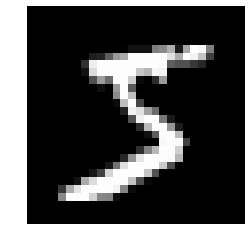

In [0]:
bala_show1img(xb[0],shape=(28,28))

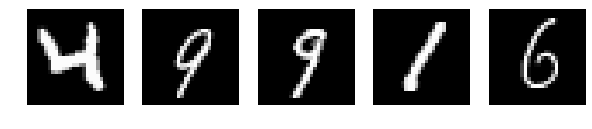

In [0]:
bala_show_random(xb)

In [0]:
bala_show_random??

In [0]:
model,opt = get_model()

In [0]:
def fit():
  for epoch in range(epochs):
    for xb,yb in train_dl:
   
      loss = loss_func( model(xb), yb)

      loss.backward()
      opt.step()
      opt.zero_grad()

In [0]:
fit()

In [0]:
measure()

(tensor(0.3593, grad_fn=<NllLossBackward>), tensor(0.9219))

In [0]:
## Sampler()


class Sampler():
  def __init__(self, ds, bs, shuffle=False):
    self.n, self.bs, self.shuffle = len(ds), bs, shuffle
    
  def __iter__(self):
    self.idxs = torch.randperm(self.n) if self.shuffle else torch.arange(self.n)
    
    for i in range(0, self.n, self.bs):
      yield self.idxs[i: i+self.bs]
    

In [0]:
small_ds = Dataset(*train_ds[:10])

In [0]:
s = Sampler(small_ds, 3, False)
[o for o in s]

[tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9])]

In [0]:
s = Sampler(small_ds, 3, True)
[o for o in s]

[tensor([9, 4, 7]), tensor([6, 2, 8]), tensor([5, 3, 0]), tensor([1])]

In [0]:
def collate(b):
  xs, ys = zip(*b)
  return torch.stack(xs), torch.stack(ys)

class DataLoader():
  def __init__(self, ds, sampler, collate_fn=collate):
    self.ds, self.sampler, self.collate_fn = ds, sampler, collate_fn
    
  def __iter__(self):
    for s in self.sampler:
      records = [ self.ds[i] for i in s]
      yield self.collate_fn(records)

In [0]:
train_samp = Sampler(train_ds, bs, shuffle=True)
valid_samp = Sampler(valid_ds, bs, shuffle=False)

In [0]:
train_dl = DataLoader(train_ds, sampler=train_samp, collate_fn=collate)
valid_dl = DataLoader(valid_ds, sampler=valid_samp, collate_fn=collate)

In [0]:
xb, yb = next(iter(train_dl))

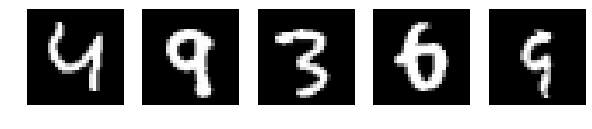

In [0]:
bala_show_random(xb)

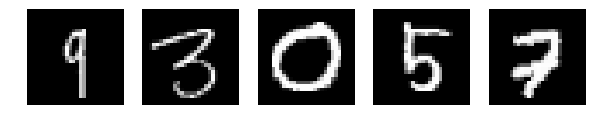

In [0]:
bala_show_random(xb)

In [0]:
model, opt = get_model()
fit()
measure()

(tensor(0.4053, grad_fn=<NllLossBackward>), tensor(0.9219))

In [0]:
from torch.utils.data import DataLoader
from torch.utils.data import SequentialSampler
from torch.utils.data import RandomSampler

In [0]:
train_dl = DataLoader(train_ds, bs, 
                      sampler=RandomSampler(train_ds), 
                      collate_fn=collate)
valid_dl = DataLoader(valid_ds, bs, 
                      sampler=SequentialSampler(valid_ds), 
                      collate_fn=collate)

In [0]:
model, opt = get_model()
fit()
measure()

(tensor(0.4293, grad_fn=<NllLossBackward>), tensor(0.9219))

In [0]:
train_dl = DataLoader(train_ds, bs, shuffle=True, drop_last=True)
valid_dl = DataLoader(valid_ds, bs, shuffle=False)

In [0]:
model, opt = get_model()
fit()
measure()

(tensor(0.4169, grad_fn=<NllLossBackward>), tensor(0.9219))

In [0]:
measure??

In [0]:
fit??

In [0]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
  for epoch in range(epochs):
    # set training model 
    model.train()
    for xb,yb in train_dl: 
      loss = loss_func( model(xb), yb)
      loss.backward()
      opt.step()
      opt.zero_grad()
      
    model.eval()
    with torch.no_grad():
      tot_loss , tot_acc = 0. , 0.
      for xb,yb in valid_dl: 
        pred = model(xb)
        tot_loss += loss_func(model(xb), yb)
        tot_acc  += accuracy(model(xb), yb)
        
    nv = len(valid_dl)
    print(epoch, tot_loss/nv , tot_acc/nv)
  return tot_loss/nv , tot_acc/nv

In [0]:
def get_model():
  model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))
  opt =  optim.SGD(model.parameters(), lr=lr) #Optimizer(model.parameters())
  return model, opt

In [0]:
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

In [0]:
epochs = 1
lr = 0.5
bs = 64

train_dl , valid_dl = get_dls(train_ds, valid_ds, bs)

model, opt = get_model()

loss_func = F.cross_entropy

loss, acc = fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 tensor(0.1654) tensor(0.9524)


In [0]:
loss , acc  =fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 tensor(0.1197) tensor(0.9644)


In [0]:
assert acc>0.9

## DataBunch / Learner

In [0]:
get_data??

In [0]:
x_train,y_train,x_valid,y_valid = get_data()
train_ds, valid_ds = Dataset(x_train, y_train) ,Dataset(x_valid, y_valid)

In [0]:
nh = 50
bs = 64
c = y_train.max().item() + 1
loss_func = F.cross_entropy

In [0]:
class DataBunch():
  
  def __init__(self, train_dl, valid_dl, c=None):
    self.train_dl = train_dl
    self.valid_dl = valid_dl
    self.c = c
  
  @property
  def train_ds(self):
    return self.train_dl.dataset #to access dataset from dataloader
  
  @property
  def valid_ds(self):
    return self.valid_dl.dataset
  
  
  def show_batch(self, figsize=(10,10)):
    #bala_show_random(self.train_dl, n=no_elems)
    rows, cols = 8 , 8
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    xb , yb = next(iter(self.train_dl))
    
    for ro in range(rows):
      for co in range(cols):
        idx = ro * co + co
        bala_show1img(xb[idx],shape=(28,28), ax=ax[ro, co])
    

In [0]:
get_dls??

def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

In [0]:
data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)

In [0]:
# data.show_batch()

In [0]:
get_model??

In [0]:
def get_model(data, lr=0.5, nh=50):
  m = data.train_ds.x.shape[1]
  model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,data.c))
  opt =  optim.SGD(model.parameters(), lr=lr) #Optimizer(model.parameters())
  return model, opt

In [0]:
class Learner():
  def __init__(self, model, opt, loss_func, data):
    self.model = model
    self.opt = opt
    self.loss_func = loss_func
    self.data = data

In [0]:
data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)
learn = Learner(*get_model(data), loss_func, data)

In [0]:
# learn

In [0]:
fit??

In [0]:
def fit(epochs, learn):
  for epoch in range(epochs):
    # set training model 
    learn.model.train()
    for xb,yb in learn.data.train_dl: 
      loss = learn.loss_func( learn.model(xb), yb)
      loss.backward()
      learn.opt.step()
      learn.opt.zero_grad()
      
    learn.model.eval()
    with torch.no_grad():
      tot_loss , tot_acc = 0. , 0.
      for xb,yb in learn.data.valid_dl: 
        pred = learn.model(xb)
        tot_loss += loss_func(learn.model(xb), yb)
        tot_acc  += accuracy(learn.model(xb), yb)
        
    nv = len(learn.data.valid_dl)
    print(epoch, tot_loss/nv , tot_acc/nv)
  return tot_loss/nv , tot_acc/nv

In [0]:
epochs =1 
loss, acc = fit(epochs, learn)

0 tensor(0.2369) tensor(0.9267)


In [0]:
# CallbackHandler

# CallbackHandler

In [0]:
import re

pat1 = '(.)([A-Z][a-z]+)'
pat2 = '([a-z0-9])([A-Z])'

_camel_re1 = re.compile(pat1)
_camel_re2 = re.compile(pat2)

def camel2snake(name):
  s1 = re.sub(_camel_re1, r'\1_\2', name)
  s2 = re.sub(_camel_re2, r'\1_\2', s1).lower()
  return s2

In [0]:
class Callback():
  _order=0
  
  def set_runner(self, run):
    self.run = run
    
  def __getattr__(self, k):
    return getattr(self.run, k)
  
  @property
  def name(self):
    name = re.sub(r'Callback$', '', self.__class__.__name__)
    return camel2snake(name or 'callback')

In [0]:
class HelloWorldCallback(Callback):
  pass

a = HelloWorldCallback()
a.name

'hello_world'

In [0]:
class TrainEvalCallback(Callback):
  
  def begin_fit(self):
    self.run.n_epochs = 0.
    self.run.n_iter = 0
    
  def after_batch(self):
    if not self.in_train: return
    self.run.n_epochs += 1/ self.iters
    self.run.n_iter += 1

  def begin_epoch(self):
    self.run.n_epochs = self.epoch
    self.model.train()
    self.run.in_train = True
    
  def begin_validate(self):
    self.model.eval()
    self.run.in_train = False

In [0]:
class TestCallback(Callback):
  def after_step(self):
    if self.train_eval.n_iters >=10: return True

In [0]:
TrainEvalCallback().name

'train_eval'

In [0]:
from typing import *

def listify(o):
  if o is None: return []
  if isinstance(o, list): return o
  if isinstance(o, str): return [o]
  if isinstance(o, Iterable): return list(o)
  return [o]

In [0]:
class Runner():
  def __init__(self, cbs=None, cb_funcs=None):
    cbs = listify(cbs)
    for cbf in listify(cb_funcs):
      cb = cbf()
      setattr(self, cb.name, cb)
      cbs.append(cb)
    self.stop = False
    self.cbs = [TrainEvalCallback()] + cbs
  
  @property
  def opt(self):    return self.learn.opt
  
  @property
  def model(self):    return self.learn.model
  
  @property
  def loss_func(self):    return self.learn.loss_func
  
  @property
  def data(self):    return self.learn.data
  
  
  def one_batch(self, xb, yb):
    self.xb , self.yb = xb, yb
    if self('begin_batch'): return
    self.pred = self.model(self.xb)
    if self('after_pred'): return
    self.loss = self.loss_func(self.pred, self.yb)
    if self('after_loss') or not self.in_train: return
    self.loss.backward()
    if self('after_backward'): return
    self.opt.step()
    if self('after_step'): return
    self.opt.zero_grad()
  
  def all_batches(self, dl):
    self.iters = len(dl)
    for xb,yb in dl:
      if self.stop: break
      self.one_batch(xb,yb)
      self('after_batch')
    self.stop = False
  
  def fit(self, epochs, learn):
    self.epochs , self.learn = epochs, learn
    
    try:
      for cb in self.cbs:
        cb.set_runner(self)
        
      if self('begin_fit'): return
      for epoch in range(epochs):
        self.epoch =  epoch
        if not self('begin_epoch'):
          self.all_batches(self.data.train_dl)

        with torch.no_grad():
          if not self('begin_validate'):
            self.all_batches(self.data.valid_dl)
        if self('after_epoch'): break
    
    finally:
      self('after_fit')
      self.learn = None
  
  
  def __call__(self, cb_name):
    for cb in sorted(self.cbs, key=(lambda x: x._order)):
      f = getattr(cb, cb_name, None)
      if f and f(): 
        return True
    return False
    

In [0]:
r = Runner()

In [0]:
#export
class AvgStats():
    def __init__(self, metrics, in_train): self.metrics,self.in_train = listify(metrics),in_train
    
    def reset(self):
        self.tot_loss,self.count = 0.,0
        self.tot_mets = [0.] * len(self.metrics)
        
    @property
    def all_stats(self): return [self.tot_loss.item()] + self.tot_mets
    @property
    def avg_stats(self): return [o/self.count for o in self.all_stats]
    
    def __repr__(self):
        if not self.count: return ""
        return f"{'train' if self.in_train else 'valid'}: {self.avg_stats}"

    def accumulate(self, run):
        bn = run.xb.shape[0]
        self.tot_loss += run.loss * bn
        self.count += bn
        for i,m in enumerate(self.metrics):
            self.tot_mets[i] += m(run.pred, run.yb) * bn

class AvgStatsCallback(Callback):
    def __init__(self, metrics):
        self.train_stats,self.valid_stats = AvgStats(metrics,True),AvgStats(metrics,False)

    def begin_epoch(self):
        self.train_stats.reset()
        self.valid_stats.reset()
        
    def after_loss(self):
        stats = self.train_stats if self.in_train else self.valid_stats
        with torch.no_grad(): stats.accumulate(self.run)
    
    def after_epoch(self):
        print(self.train_stats)
        print(self.valid_stats)

In [0]:
learn = Learner(*get_model(data), loss_func, data)

In [0]:
stats = AvgStatsCallback([accuracy])
run = Runner(cbs=stats)

In [0]:
run.fit(2, learn)

train: [0.31283396484375, tensor(0.9040)]
valid: [0.16162254638671875, tensor(0.9530)]
train: [0.145072255859375, tensor(0.9562)]
valid: [0.336166357421875, tensor(0.9029)]


In [0]:
# stats.train_stats.avg_stats

In [0]:
from functools import partial

acc_cbf = partial(AvgStatsCallback, accuracy)
run = Runner(cb_funcs=acc_cbf)

In [0]:
run.fit(1, learn)

train: [0.111758173828125, tensor(0.9657)]
valid: [0.15669407958984374, tensor(0.9561)]


In [0]:
run.avg_stats.train_stats

train: [0.111758173828125, tensor(0.9657)]

In [0]:
run.avg_stats.valid_stats

valid: [0.15669407958984374, tensor(0.9561)]

In [1]:
from functools import partial